## __Basic config__

In [ ]:
# Connecting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory into the git folder
GIT_FOLDER_NAME = 'Paper_implementations'
GIT_FOLDER_PATH = f'drive/My Drive/{GIT_FOLDER_NAME}/'
%cd "{GIT_FOLDER_PATH}"

In [ ]:
%pwd

'/content/drive/My Drive/Paper_implementations'

In [ ]:
# Autoreload imported modules
%load_ext autoreload
%autoreload 2

In [ ]:
# Reload autoreload
%reload_ext autoreload

__Colab instance info__

In [ ]:
#CPU
!cat /proc/cpuinfo

In [ ]:
#Memory
!cat /proc/meminfo

## __Vision models__

In [ ]:
%cd vision

/content/drive/My Drive/Paper_implementations/vision


In [ ]:
from CNN_architectures.VGG import VGG_net
from CNN_architectures.AlexNet import AlexNet
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

## __VGG__

Norm layers were ignored in this implementation.

Trained v2 - 68% accuracy

Trained v3 - 74% accuracy

In [ ]:
model = VGG_net(in_channels=3, num_classes=1000)

In [ ]:
print(model)

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
# Sanity check
x = torch.randn(3, 3, 224, 224)

assert tuple(model(x).shape) = (3, 1000)

torch.Size([3, 1000])


In [ ]:
# loss(model, random) ~ -log(1/c)

#### __Training CIFAR10__


Reference https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
#Using torchvision.transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
#Downloading datasets
cifar10data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
len(cifar10data), len(test_set)

(50000, 10000)

In [ ]:
#Divide training set into validation and training set
from torch.utils.data import random_split

train_set, val_set = random_split(cifar10data, [40000, 10000])
len(train_set), len(val_set)

(40000, 10000)

In [ ]:
#Preparing dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, 
                                           pin_memory=True,
                                           shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4,
                                          shuffle=False, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                          shuffle=False, num_workers=1)

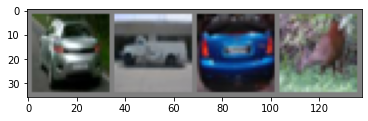

  car truck   car  deer


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show image
imshow(torchvision.utils.make_grid(images))
# print label
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [ ]:
images.shape

torch.Size([4, 3, 32, 32])

__Instantiate the model__

In [ ]:
model = VGG_net(in_channels=3, num_classes=10,output_conv_layers= 1*1*512)

In [ ]:
#Sanity check
x = dataiter.next()
x = torch.Tensor(x[0])
print(x.shape)
print(model(x).shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 10])


In [ ]:
#Choosing criterion and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Use GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model.to(device)

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
# Overfitear un batch del baseline
# Baseline - LSTM, LeNet (60)
# Overfitear un batch del modelo completo
# Modelo semi-completo  -> -> -> -> -> -> -> -> -> -> -> -> modelo final

In [ ]:
# Training loop

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
      # Codigo de validacion
      # ERROR xC 

print('Finished Training')

[1,  2000] loss: 0.804
[1,  4000] loss: 0.809
[1,  6000] loss: 0.810
[1,  8000] loss: 0.789
[1, 10000] loss: 0.773
[2,  2000] loss: 0.667
[2,  4000] loss: 0.664
[2,  6000] loss: 0.690
[2,  8000] loss: 0.657
[2, 10000] loss: 0.651
Finished Training


In [ ]:
PATH = './model_weights/vgg_cifar10_v3.pth'

In [ ]:
#Save the model

torch.save(model.state_dict(), PATH)

In [ ]:
# Upload a trained model
model = VGG_net(in_channels=3, num_classes=10,output_conv_layers= 1*1*512)
model.load_state_dict(torch.load(PATH))
model.to(device)

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
# See how it performs for the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 74 %


## __AlexNet__

The Norm layer on the paper was replaced with BatchNorm

In [ ]:
model = AlexNet()

In [ ]:
print(model)

AlexNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer

In [ ]:
# Sanity check
x = torch.randn(3, 3, 227, 227)
print(model(x).shape)

torch.Size([3, 1000])
